In [155]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [171]:
W1 = torch.Tensor([1]).view(1,1)
W2 = W1
W2 += 0

In [172]:
# Generate input values (truth values)
A_values = torch.linspace(-2, 2, 100)  # 100 values from 0 to 1
B_values = torch.linspace(-2, 2, 100)

A_values_trans = (W1 @ A_values.unsqueeze(0)).squeeze()
B_values_trans = (W2 @ B_values.unsqueeze(0)).squeeze()
 
A_grid, B_grid = torch.meshgrid(A_values_trans, B_values_trans)
result = torch.nn.Sigmoid()(B_grid + A_grid)
result = B_grid * A_grid


In [239]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, bias=False):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=bias)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size, bias=bias)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
m = SimpleMLP(1,2,1)

In [281]:
class SimpleMLP3(nn.Module):
    def __init__(self, input_size, hidden_size, bias=False):
        super(SimpleMLP3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=bias)
        self.relu = nn.ReLU()
        c = nn.Parameter(torch.rand([1]))
        self.fc2 = torch.Tensor([c, 1-c])
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = out @ self.fc2.T
        return out

m = SimpleMLP3(1,2)
mm(x)

SimpleMLP3(
  (fc1): Linear(in_features=1, out_features=2, bias=False)
  (relu): ReLU()
)

In [ ]:
theta3 * (nn.ReLU()(theta1 * x)) + (1-theta3) * (nn.ReLU()(theta2 * x))

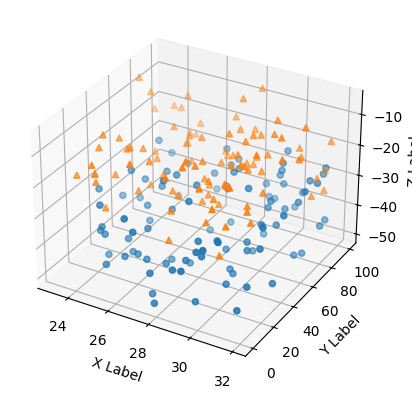

In [286]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

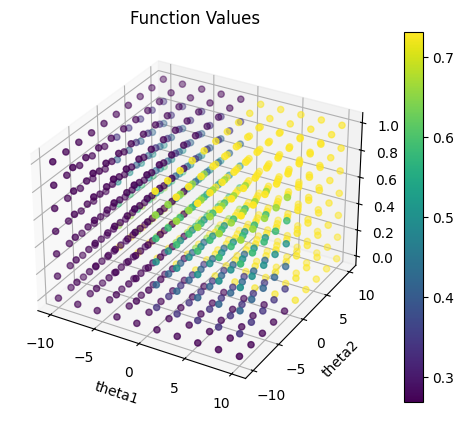

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def my_function(theta1, theta2, theta3, x):
    nonlin = nn.Tanh()
    return nn.Sigmoid()(theta3 * nonlin(theta1 * x) + (1 - theta3) * nonlin(theta2 * x))

# Generate data points
theta1_range = torch.linspace(-10, 10, 10)
theta2_range = torch.linspace(-10, 10, 10)
theta3_range = torch.linspace(-0, 1, 7)

X, Y, Z = torch.meshgrid(theta1_range, theta2_range, theta3_range)
values = my_function(X, Y, Z, 2)  # Replace 2 with your desired constant x

# Create the 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on values
scatter = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=values.flatten(), cmap='viridis')

# Add labels and title
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('theta3')
ax.set_title('Function Values')

# Add colorbar
plt.colorbar(scatter)

plt.show()

tensor(0.8333)


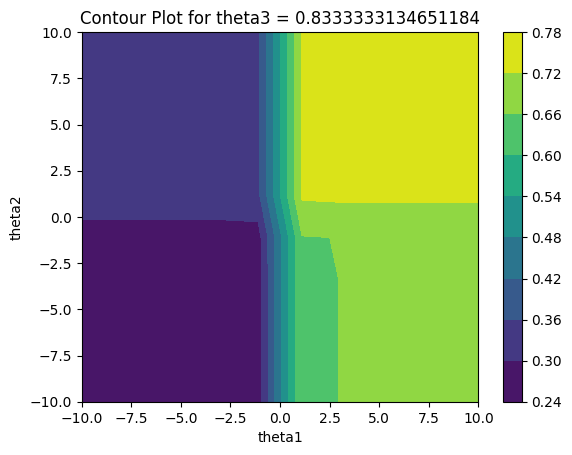

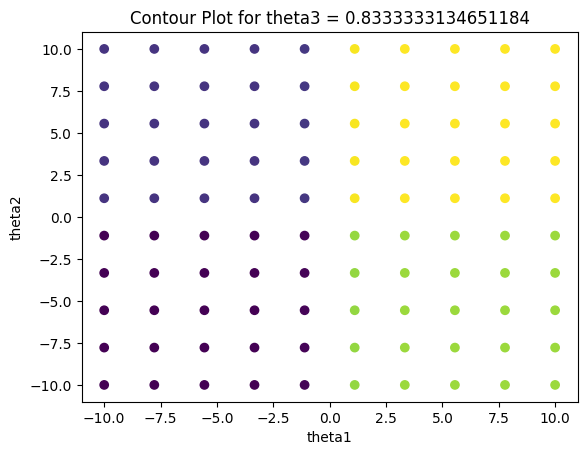

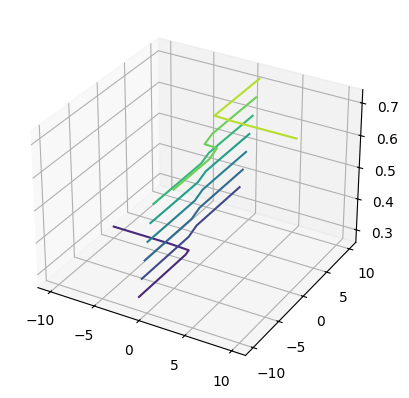

In [422]:
# Create the contour plot for a fixed theta3
theta3_fixed = theta3_range[-2]  # Replace with your desired theta3 value
print(theta3_fixed)
contour_values = values[:,:,theta3_range == theta3_fixed].squeeze()

# Create the contour plot
plt.figure()
plt.contourf(X[:,:,0], Y[:,:,0], contour_values, cmap='viridis')
plt.colorbar()
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.title(f'Contour Plot for theta3 = {theta3_fixed}')
plt.show()

plt.figure()
plt.scatter(X[:,:,0], Y[:,:,0], c=contour_values, cmap='viridis')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.title(f'Contour Plot for theta3 = {theta3_fixed}')
plt.show()


ax = plt.figure().add_subplot(projection='3d')

ax.contour(X[:,:,0], Y[:,:,0], contour_values, cmap='viridis')  # Plot contour curves
plt.show()